<a href="https://colab.research.google.com/github/jyotsnakoul/AI-ML-Month/blob/main/AlinaJoji_JyotsnaKoul_HeartFailurePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members:**

Name: Alina Elizabeth Joji

Enrollment Number: 15401172021

Email id: alinaelizabeth154btcsai21@igdtuw.ac.in


Name: Jyotsna Koul

Enrollment Number: 15501172021

Email id: jyotsna155btcsai21@igdtuw.ac.in

---

# Introduction

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries and an increased risk of blood clots.


**There are four main types of CVD:**

1. Coronary heart disease.
2. Stroke
1. Aortic disease.
2. Peripheral arterial disease.

Cardiovascular diseases are the leading cause of death worldwide. Together CVD resulted in 17.9 million deaths (32.1%) in 2015.

Coronary artery disease and stroke account for 80% of CVD deaths in males and 75% of CVD deaths in females.

In the United States 11% of people between 20 and 40 have CVD, while 37% between 40 and 60, 71% of people between 60 and 80, and 85% of people over 80 have CVD.

The average age of death from coronary artery disease in the developed world is around 80 while it is around 68 in the developing world.

Several machine learning (ML) algorithms have been increasingly utilized for cardiovascular disease prediction. 

# Data Analysis


In [ ]:
# Importing python libraries

# Libraries for Data Preprocessing
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss 

# Libraries for Data Visualization 
import plotly.express as px 
from plotly.subplots import make_subplots 
from matplotlib import pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

# Libraries for Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Libraries for Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix , precision_score, recall_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import model_selection

%matplotlib inline

In [ ]:
#Enabling GPU support for more computationally demanding tasks like Deep Learning.

import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
#Uploading dataset from local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv
User uploaded file "heart_failure_clinical_records_dataset.csv" with length 12239 bytes


In [ ]:
#Uploading the dataset
df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
#The data set
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#Displying the column names
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
#Displays the no of rows and columns
df.shape

(299, 13)

So, the data set consists of 13 columns and 299 rows

**THE DESCRIPTION OF THE 13 COLUMNS IS SHOWN BELOW**
1. age: Displays the age of an indivisual.It is the an important risk factor in developing cardiovascular or heart diseases.

2. anaemia: Diaslays whether there is any decrease of haemoglobin . Anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and can be very impactful on the progression of heart failure 

  0- Non-Anaemic

  1- Anaemic

3. creatinine_phosphokinase: Displays the level of CPK enzyme in blood.An elevated level of creatine kinase is seen in heart attacks, when the heart muscle is damaged, or in conditions that produce damage to the skeletal muscles or brain. CPK normal values: 10 to 120 micrograms per liter.

4. diabetes: Displays if the patient suffers from diabetes. Over time, high blood sugar levels can damage blood vessels and the nerves that control your heart. People with diabetes are also more likely to have other conditions that raise the risk for heart disease.

    0: Non-Diabetic

    1: Diabetic

5. ejection_fraction: Displays the percentage of blood leaving the heart at each contraction. EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction.A normal heart’s ejection fraction may be between 50 and 70 percent.

6. high_blood_pressure: Displays whether the person suffers from high blood pressure or not.It increases the force of blood through your arteries and can damage artery walls.It occurs with other conditions like- obesity, high cholesterol or diabetes.These increase the risk of heart failure.
     
      0- Blood Pressure: Normal

      1- Blood Pressure: High 

7. platelets: Displays the count of platelets in the blood (kiloplatelets/mL). Platelets are colorless blood cells that help blood clot.But platelets can also form blood clots inside blood vessels and, if they block blood vessels supplying the heart, can cause heart attacks and strokes. The normal range of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL).
 

8. serum_creatinine: Displays the level of serum creatinine in the blood (mg/dL). 

  An increased level of creatinine may be a sign of poor kidney function. The normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.
 

9. serum_sodium: Displays the level of serum sodium in the blood (mEq/L). The normal range for blood sodium levels is 141 to 143 milliequivalents per liter (mEq/L).
 

10. sex: Displays the gender of the individual. Men are at greater risk of heart disease than pre-menopausal women. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.

     0: Female 

     1: Male 

11. smoking: Displays if the patient smokes or not. Smoking is a major risk factor for the development of heart failure. 
    
     0: Non-smoker  
     
     1: Smoker 
12. time: Displays the number of days in the Follow-up period. Outpatient follow-up within 14 days after HF exacerbation requiring hospitalization or emergency department visit is associated with better outcomes, particularly if the follow-up is with a familiar physician.

13. DEATH_EVENT: Displays if the patient deceased during the follow-up period. 

     0: Alive

     1: Deceased 


# Data Visualization

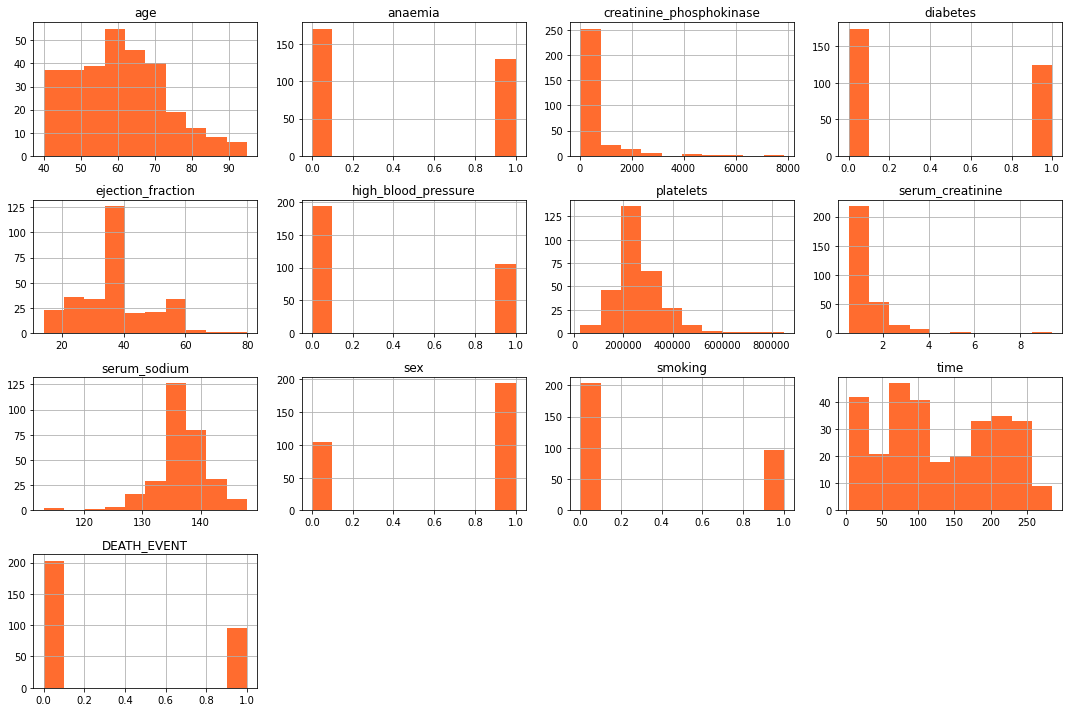

In [ ]:
#Displaying values of different columns of dataset
df.hist(bins=10, figsize=(15, 10), color="#FF6C2F")
plt.tight_layout()

**Explanation**
1.The data provided to us belongs to people of age group 40-90.

2.The Anaemia, Diabetes, High Blood Pressure and Smoking plots displays whether individuals suffer from them(1) or not(0)

3.The Death Event column shows whether the person is aliver(0) or dead due to heart failure(1)

4.The sex column signifies whether the individual is a man(1) or a woman(0)

5.The levels of creatinine phosphokinase, serum sodium, platelets count and serum creatinine are depicted in their specific plots

In [ ]:
#Creating a copy of dataset for the visualization
dv= df.copy()

#Changing values 1, 0 to have the issue or not
dv['anaemia'] = np.where(dv['anaemia'] == 1, 'Anaemic', 'Non-Anaemic')
dv['diabetes'] = np.where(dv['diabetes'] == 1, 'Diabetic', 'Non-Diabetic')
dv['high_blood_pressure'] = np.where(dv['high_blood_pressure'] == 1, 'High', 'Normal')
dv['sex'] = np.where(dv['sex'] == 1, 'Male', 'Female')
dv['smoking'] = np.where(dv['smoking'] == 1, 'Smoker', 'Non-Smoker')
dv['DEATH_EVENT'] = np.where(dv['DEATH_EVENT'] == 0, 'Alive', 'Deceased')

#explore first five rows in the dataset
dv.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Non-Anaemic,582,Non-Diabetic,20,High,265000.00,1.9,130,Male,Non-Smoker,4,Deceased
1,55.0,Non-Anaemic,7861,Non-Diabetic,38,Normal,263358.03,1.1,136,Male,Non-Smoker,6,Deceased
2,65.0,Non-Anaemic,146,Non-Diabetic,20,Normal,162000.00,1.3,129,Male,Smoker,7,Deceased
3,50.0,Anaemic,111,Non-Diabetic,20,Normal,210000.00,1.9,137,Male,Non-Smoker,7,Deceased
4,65.0,Anaemic,160,Diabetic,20,Normal,327000.00,2.7,116,Female,Non-Smoker,8,Deceased


In [ ]:
#Visualizing Age, level of serum creatinine, level of serum sodium and ejection fraction
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Age", "Level of serum creatinine", "Level of serum sodium", "Ejection fraction"))

#Age
fig.add_trace(go.Histogram(x=dv.age[dv['DEATH_EVENT'] == 'Deceased'], name='Deceased',
                          marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           xbins=dict(size=10 )),
                           row=1, col=1)
#Age
fig.add_trace(go.Histogram(x=dv.age[dv['DEATH_EVENT'] == 'Alive'], name='Alive',
                          marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           xbins=dict(size=10 )),row=1, col=1)
##level of serum creatinine
fig.add_trace(go.Histogram(x=dv.serum_creatinine[dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25)),row=1, col=2)
##level of serum creatinine
fig.add_trace(go.Histogram(x=dv.serum_creatinine[dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25 )),row=1, col=2)
##level of serum sodium
fig.add_trace(go.Histogram(x=dv.serum_sodium[dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25)),row=1, col=3)
##level of serum sodium
fig.add_trace(go.Histogram(x=dv.serum_sodium[dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25 )),row=1, col=3)
#Ejection Fraction
fig.add_trace(go.Histogram(x=dv.ejection_fraction [dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=5 )),row=1, col=4)
#Ejection Fraction
fig.add_trace(go.Histogram(x=dv.ejection_fraction [dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=5 )),row=1, col=4)
#Tittle config
fig.update_layout(title_x=0.5,title_text="Heart failure deaths distribution by:", height=400,barmode='stack',font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=12),paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#config opacity
fig.update_traces(opacity=0.80)

fig.show()


<b> Explanation: </b>
<n>
<ol>
<li> Age Plot: 
<n>
<ul>
<li> Existing data consists of people belong to the age group 50-70</li>
<li> Heart Failure is common in sixties </li>
<li> Most people in the age group 80-100 are prone to heart failure</li>
<li> Heart failure is less common but still persists int the age group 40-50 </li>
</ul>
</li>
<li> Serum Creatinine Plot:
<ul>
<li> This plot shows unclear values of the level of sodium creatinine in blood </li>
</ul>
</li> 
<li> Serum Sodium Plot: 
<n>
<ul>
<li> Almost all the individuals have their level of serium sodium in blood in the range of 130-150 mEq/l </li>
</ul>
<li> Ejection Fraction Plot:
<n>
<ul>
<li> Most of the people in the existing dataset have 35-40% as their ejection fraction. </li>
<li> The value of ejection fraction varies widely among individuals ranging majorly from 20 to 70% </li>
<li> Heart failure occured mainly among people with ejection fraction between 20-30%
<li> Heart failure is least seen when individual has an ejection fraction of about 70%
</ul>


In [ ]:
#Visualizing the median values of the above columns

#creating variable with median age, median level of sodium creatinine and median ejection_fraction
median_age=dv.groupby('DEATH_EVENT')['age'].median()
median_creatinine=dv.groupby('DEATH_EVENT')['serum_creatinine'].median()
median_sodium=dv.groupby('DEATH_EVENT')['serum_sodium'].median()
median_ejection_fraction=dv.groupby('DEATH_EVENT')['ejection_fraction'].median()
#reset index and sort values
median_age=median_age.reset_index().sort_values('age', ascending=False)
median_creatinine=median_creatinine.reset_index().sort_values('serum_creatinine',ascending=False )
median_sodium=median_sodium.reset_index().sort_values('serum_sodium')
median_ejection_fraction=median_ejection_fraction.reset_index().sort_values('ejection_fraction')
x_value = median_age.DEATH_EVENT

#making the plots
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Age", "Level of serum creatinine", "Level of serum sodium", "Ejection fraction"))

#create bar plot

#Age
fig.add_trace(go.Bar(x=x_value,y=median_age.age, text=median_age.age,textposition='outside',showlegend=False,
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=1)

#Serum creatinine
fig.add_trace(go.Bar(x=x_value,y=median_creatinine.serum_creatinine, text=median_creatinine.serum_creatinine,
                     showlegend=False, textposition='outside',
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=2)

#Serum sodium
fig.add_trace(go.Bar(x=x_value,y=median_sodium.serum_sodium, text=median_sodium.serum_sodium,
                     showlegend=False, textposition='outside',
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=3)

#ejection fraction
fig.add_trace(go.Bar(x=x_value,y=median_ejection_fraction.ejection_fraction, text=median_ejection_fraction.ejection_fraction,textposition='outside',showlegend=False,
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=4)

#bar plot config
fig.update_layout(title_x=0.5,title_text="Median Values of:", height=450,font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=13),paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#bar plot config
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1.5,marker_line_color="black")

#config space subtitles
for i in range(0,4):
    fig.layout.annotations[i].update(y=1.05)

#bar plot config
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

<b> Explanation: </b>
<n>
<ol>
<li> Age Plot: 
<n>
<ul>
<li> The median age of people who died of hear failure is 65 years</li>
<li> The median age of the alive people in the existing dataset is 60 years </li>
</ul>
</li>
<li> Serum Creatinine Plot:
<ul>
<li> The median value of serum creatinine in blood of deceased individuals is 1.3 mg/dL </li>
<li> The median value of serum creatinine in blood of alive people in the existing datset is 1 mg/dL </li>
<li> The values coincides with the fact that increased level of creatinine is a sign of poor kidney function as contributes to heart failure </li>
</ul>
</li> 
<li> Serum Sodium Plot: 
<n>
<ul>
<li>  The median value of serum sodium in blood of deceased individuals is 135.5 mEq/L </li>
<li> The median value of serum sodium in blood of alive people in the existing datset is 137 mEq/L </li>
</ul>
<li> Ejection Fraction Plot:
<n>
<ul>
<li>The median value of ejection fraction of deceased individuals is 30% </li>
<li> The median value of ejection fraction of alive people in the existing datset is 38% </li>



Text(0.5, 1.0, 'Relationship between Platelets count and heart failure deaths')

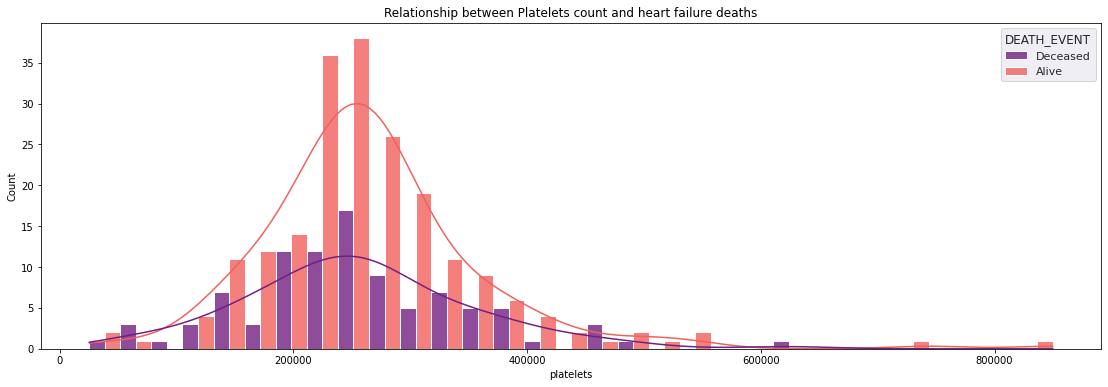

In [ ]:
#Visualizing the effect of platelets count
fig, axes = plt.subplots(1,1, figsize=(19,6))
sns.set()
sns.histplot(data=dv, x="platelets", alpha=0.8, hue = "DEATH_EVENT",kde=True, multiple="dodge", palette="magma")
plt.title("Relationship between Platelets count and heart failure deaths")

**Explanation:**

The graph coincides with the fact that the normal platelets count in the blood lies between 150K to 400K platelets/mcL</li>

Text(0.5, 1.0, 'Relationship between Creatinine Phosphokinase and heart failure deaths')

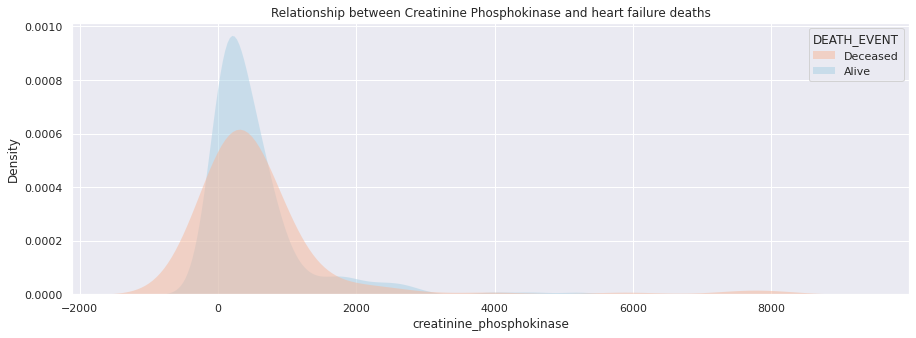

In [ ]:
#Visualizing the effect of creatinine phosphokinase count
fig, axes = plt.subplots(1,1, figsize=(15,5))
sns.set()
sns.kdeplot(x=dv["creatinine_phosphokinase"], hue=dv["DEATH_EVENT"], common_norm=False, palette="RdBu",
   alpha=.5, linewidth=0, shade=True)
plt.title("Relationship between Creatinine Phosphokinase and heart failure deaths")

In [ ]:
# Visualizing all the boolean columns

visu = pd.DataFrame()
#variable with 0 for the iteration
num = 0
#variable with the name of columns
variables = ['sex','high_blood_pressure','anaemia','diabetes','smoking']
#for loop to get the percentage of columns
for i in variables:
    num += 1
    temp = dv.groupby(i)['DEATH_EVENT'].value_counts(normalize=True)
    temp = temp.mul(100).rename('percentage' + str(num)).reset_index()
    visu = pd.concat([visu, temp], axis=1)

#drop diplicated values    
visu = visu.loc[:, ~visu.columns.duplicated()]
visu = visu.round(decimals = 2)
#colors for the visualizations
color_rgb = ['rgb(25, 132, 197)','rgb(213, 160, 54)']
num = 0
#loop for creating visualizations
for i in variables:
    num +=1
    fig = px.histogram(visu, x=i, y='percentage' + str(num),
             color='DEATH_EVENT', barmode='group', 
             text_auto=True,
             height=450, width = 600,color_discrete_sequence= color_rgb,opacity=0.8)
    #config plot
    fig.update_layout(title_x=0.5,title_text=(f"Heart failure deaths distribution by {i}"), height=450,font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=13),yaxis_title=None, xaxis_title= i,
                      paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
    
     #config plot
    fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1,marker_line_color="black")
    fig.update_yaxes(title="", ticksuffix='%')
    fig.show()

b> Explanation: </b>
<ol>
<li> Sex Plot:
<n>
<ul> 
<li> The percentage of heart failure in females is 32.28% </li>
<li> The percentage of heart failue in males is 31.96% </li>
<li> The graph shows that women are more prone to heart failures than men </li>
</ul>
<li> High Blood Pressure Plot:
<n>
<ul>
<li> Almost 40% of people with high blood pressure suffer heart failure</li>
<li> 30% of people with normal blood pressure also suffer heart failure </li>
</ul>
<li> Anaemia Plot:
<n>
<ul>
<li> 35.66% anaemic people suffer heart failure </li>
<li> 29.41% non-anaemic people suffer hear failure as well. </li>
</ul>
<li> Diabetes Plot: 
<n>
<ul>
<li> 32% of people with diabetes suffer heart failure </li>
<li> 32% of all the non-diabetic people also suffer heart failure </li>
</ul>
<li> Smoking Plot:
<ul> 
<li> 32% of people who smoke experience heart failures </li>
<li> 31.25% of people who do not smoke still suffer hear failure 

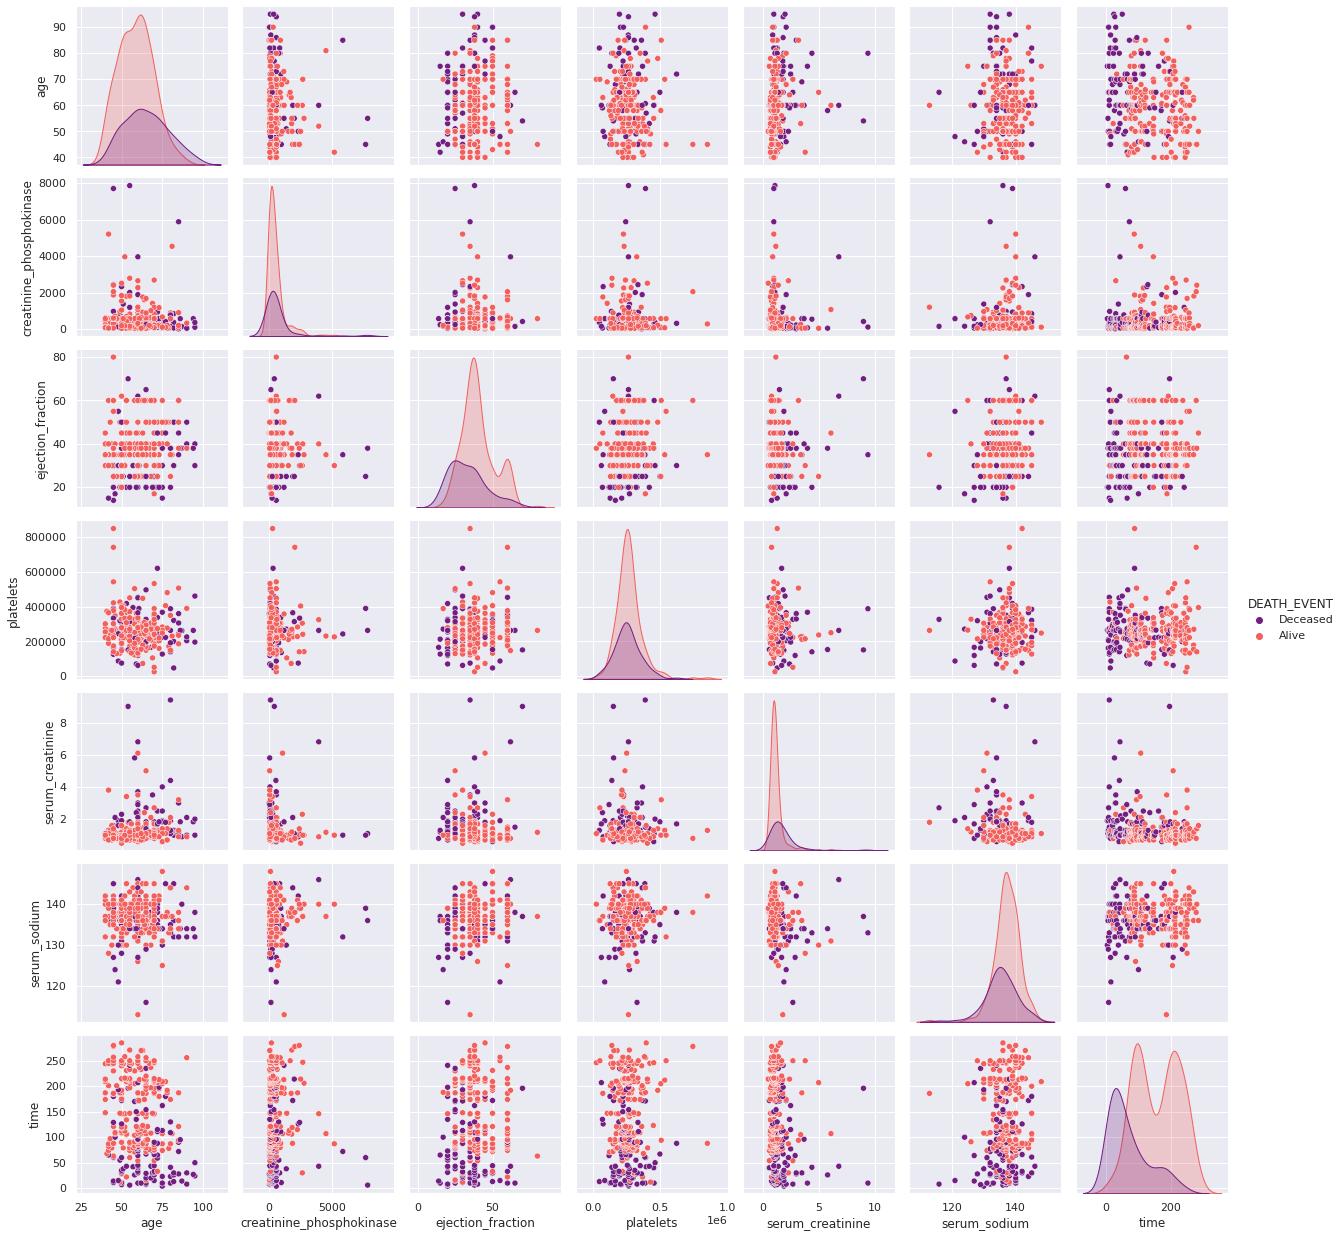

In [ ]:
sns.pairplot(dv,hue='DEATH_EVENT',palette='magma')

**Inter-relationship among all the factors causing heart failure**

In [ ]:
df.describe()[:].T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,299.000000,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


**Visualizing basic statistical details such as-percentile, mean, std etc. of a data frame or a series of numeric values.**

In [ ]:
fig = px.imshow(df.corr(), color_continuous_scale="magma")
fig.update_layout(height=750)
fig.show()

**Quick overview or exploratory analysis of data from the existing dataset**

In [ ]:
# Oversampling(Upsampling) the minority class

from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['DEATH_EVENT']==0)] 
df_minority = df[(df['DEATH_EVENT']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 203, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

print(df_upsampled['DEATH_EVENT'].value_counts())
print(df_upsampled)

1    203
0    203
Name: DEATH_EVENT, dtype: int64
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
59   72.0        0                       364         1                 20   
230  60.0        0                       166         0                 30   
15   82.0        1                       379         0                 50   
126  46.0        0                       168         1                 17   
72   85.0        0                      5882         0                 35   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure 

#MACHINE LEARNING MODELS


We will be training the models above with the upsampled data

<h3> <b> The classification models used in this problem are as follows: </b></h3>
<h4>
<ul>
<li> Logistic Regression </li>
<li> Random Forest </li>
<li> Nearest Neighbour (KNN) Classifier </li>
<li> Decision Tree </li>
<li> Naive Bayes Classifier </li>
<li> SVM </li>
<li> LightGBM </li>
<li> XGBoost </li>
</h4>

In [ ]:
ddf=df_upsampled
x=ddf.drop(columns=['DEATH_EVENT'])
y=ddf['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scs = ss()
x_train = scs.fit_transform(x_train)
x_test = scs.transform(x_test)

In [ ]:
model_test={}

# <h1 align="center"> Logistic Regression </h1>

In [ ]:
lr=LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_test= lr.predict(x_test)
y_pred_test

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_pred_train= lr.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
79.26829268292683


## <h1 align="center"> Confusion Matrix </h1>


In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  7]
 [10 34]]

True Positives(TP) =  31

True Negatives(TN) =  34

False Positives(FP) =  7

False Negatives(FN) =  10


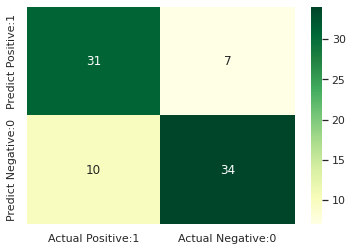

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.83      0.77      0.80        44

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.80      0.79      0.79        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2073


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.7999999999999999
Accuracy: 0.7926829268292683
Recall : 0.7727272727272727
Precision : 0.8292682926829268


# <h1 align="center"> Random Forest </h1>

In [ ]:
clf = RandomForestClassifier(n_estimators = 10, random_state =0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred_test= clf.predict(x_test)
y_pred_test

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
y_pred_train= clf.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
99.38271604938271


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
91.46341463414635


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[36  2]
 [ 5 39]]

True Positives(TP) =  36

True Negatives(TN) =  39

False Positives(FP) =  2

False Negatives(FN) =  5


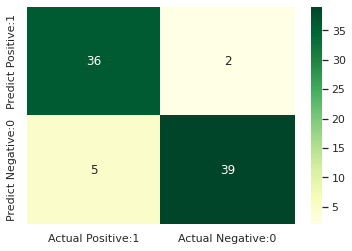

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.95      0.89      0.92        44

    accuracy                           0.91        82
   macro avg       0.91      0.92      0.91        82
weighted avg       0.92      0.91      0.91        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0854


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['Random Forest']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.9176470588235294
Accuracy: 0.9146341463414634
Recall : 0.8863636363636364
Precision : 0.9512195121951219


# <h1 align="center">K Nearest Neighbour (KNN) Classifier </h1>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_test = knn.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
84.25925925925925


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
80.48780487804879


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  7]
 [ 9 35]]

True Positives(TP) =  31

True Negatives(TN) =  35

False Positives(FP) =  7

False Negatives(FN) =  9


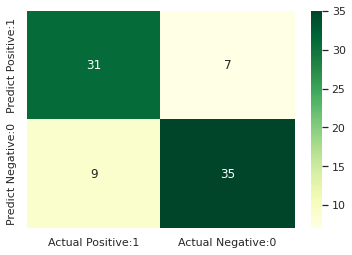

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.79        38
           1       0.83      0.80      0.81        44

    accuracy                           0.80        82
   macro avg       0.80      0.81      0.80        82
weighted avg       0.81      0.80      0.81        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1951


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['KNN']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.8139534883720929
Accuracy: 0.8048780487804879
Recall : 0.7954545454545454
Precision : 0.8333333333333334


# <h1 align="center"> Decision Tree </h1>

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train = tree.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
y_pred_test = tree.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
86.58536585365853


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  5]
 [ 6 38]]

True Positives(TP) =  33

True Negatives(TN) =  38

False Positives(FP) =  5

False Negatives(FN) =  6


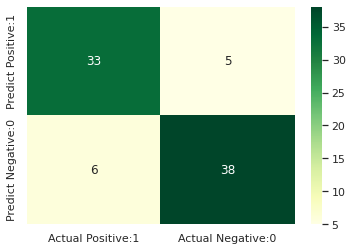

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.88      0.86      0.87        44

    accuracy                           0.87        82
   macro avg       0.86      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1341


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['Decision Tree']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.8735632183908046
Accuracy: 0.8658536585365854
Recall : 0.8636363636363636
Precision : 0.8837209302325582


# <h1 align="center"> Naive Bayes Classifier </h1>

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_test = gnb.predict(x_test)
y_pred_test

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
77.1604938271605


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
75.60975609756098


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  3]
 [17 27]]

True Positives(TP) =  35

True Negatives(TN) =  27

False Positives(FP) =  3

False Negatives(FN) =  17


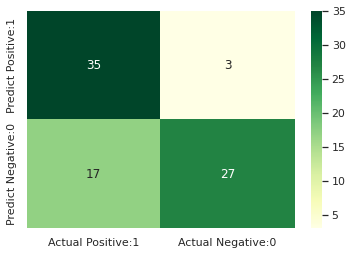

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78        38
           1       0.90      0.61      0.73        44

    accuracy                           0.76        82
   macro avg       0.79      0.77      0.75        82
weighted avg       0.79      0.76      0.75        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2439


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.7297297297297297
Accuracy: 0.7560975609756098
Recall : 0.6136363636363636
Precision : 0.9


# <h1 align="center"> SVM </h1>

In [ ]:
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_train = classifier.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
y_pred_test = classifier.predict(x_test)
y_pred_test

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
92.5925925925926


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
85.36585365853658


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  4]
 [ 8 36]]

True Positives(TP) =  34

True Negatives(TN) =  36

False Positives(FP) =  4

False Negatives(FN) =  8


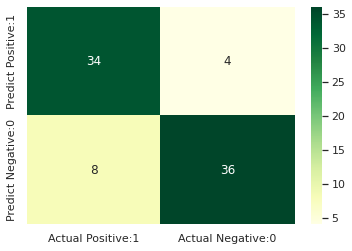

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.90      0.82      0.86        44

    accuracy                           0.85        82
   macro avg       0.85      0.86      0.85        82
weighted avg       0.86      0.85      0.85        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1463


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['SVM']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.8571428571428572
Accuracy: 0.8536585365853658
Recall : 0.8181818181818182
Precision : 0.9


# <h1 align="center">LightGBM </h1>

In [ ]:
clf = LGBMClassifier()
clf.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
#Prediction
y_pred_train = clf.predict(x_train)
print(y_pred_train)

[0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1]


In [ ]:
#Prediction
y_pred_test = clf.predict(x_test)

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
95.1219512195122


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  3]
 [ 1 43]]

True Positives(TP) =  35

True Negatives(TN) =  43

False Positives(FP) =  3

False Negatives(FN) =  1


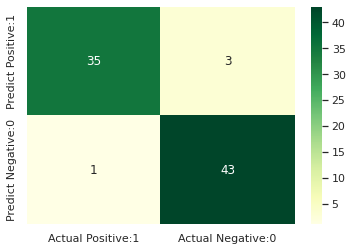

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.93      0.98      0.96        44

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0488


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['LightGBM']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.9555555555555557
Accuracy: 0.9512195121951219
Recall : 0.9772727272727273
Precision : 0.9347826086956522


# <h1 align="center"> XGBoost <h1>

In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred_train = xg.predict(x_train)
#convert into binary values
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0

In [ ]:
y_pred_test = xg.predict(x_test)
for i in range(0, len(y_pred_test)):
    if y_pred_test[i]>= 0.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:  
       y_pred_test[i]=0

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
99.07407407407408


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  3]
 [ 4 40]]

True Positives(TP) =  35

True Negatives(TN) =  40

False Positives(FP) =  3

False Negatives(FN) =  4


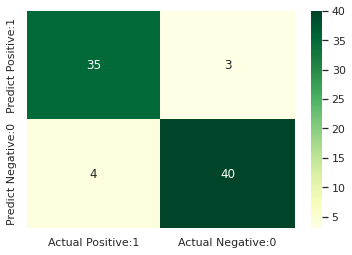

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.93      0.91      0.92        44

    accuracy                           0.91        82
   macro avg       0.91      0.92      0.91        82
weighted avg       0.92      0.91      0.91        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0854


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['XGBoost']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.9195402298850575
Accuracy: 0.9146341463414634
Recall : 0.9090909090909091
Precision : 0.9302325581395349


# <b> <h1 align="center"> MODEL COMPARISON </h1> </b>

In [ ]:
#comparing all the model algorithms together
model_test

{'Decision Tree': [0.8735632183908046,
  0.8658536585365854,
  0.8837209302325582,
  0.8636363636363636,
  0.13414634146341464],
 'KNN': [0.8139534883720929,
  0.8048780487804879,
  0.8333333333333334,
  0.7954545454545454,
  0.1951219512195122],
 'LightGBM': [0.9555555555555557,
  0.9512195121951219,
  0.9347826086956522,
  0.9772727272727273,
  0.04878048780487805],
 'Logistic Regression': [0.7999999999999999,
  0.7926829268292683,
  0.8292682926829268,
  0.7727272727272727,
  0.2073170731707317],
 'Naive Bayes': [0.7297297297297297,
  0.7560975609756098,
  0.9,
  0.6136363636363636,
  0.24390243902439024],
 'Random Forest': [0.9176470588235294,
  0.9146341463414634,
  0.9512195121951219,
  0.8863636363636364,
  0.08536585365853659],
 'SVM': [0.8571428571428572,
  0.8536585365853658,
  0.9,
  0.8181818181818182,
  0.14634146341463414],
 'XGBoost': [0.9195402298850575,
  0.9146341463414634,
  0.9302325581395349,
  0.9090909090909091,
  0.08536585365853659]}

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp_df = pd.DataFrame.from_dict(model_test).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error']
model_comp_df = model_comp_df.sort_values('F1 Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error
Naive Bayes,0.729730,0.756098,0.900000,0.613636,0.243902
Logistic Regression,0.800000,0.792683,0.829268,0.772727,0.207317
KNN,0.813953,0.804878,0.833333,0.795455,0.195122
SVM,0.857143,0.853659,0.900000,0.818182,0.146341
Decision Tree,0.873563,0.865854,0.883721,0.863636,0.134146
Random Forest,0.917647,0.914634,0.951220,0.886364,0.085366
XGBoost,0.919540,0.914634,0.930233,0.909091,0.085366
LightGBM,0.955556,0.951220,0.934783,0.977273,0.048780


<b> Explanation: </b>
<ul>
<li>LightGBM shows the highest accuracy of 95.122% with a recall of 97.7%
<li> Random Forest shows an accuracy of 91.4634% with a precesion value 95.12%
<li> XGBoost also shows an accuracy of 91.4634% with a precision of 93.02%

In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

<b> 
<ul>
<li>It can clearly be seen that LightGBM, XGBoost and Random Forest models perform the best in that order respectively
<li> LightGBM has minimum classification error out of all the models
<li> LightGBM has maximum recall value
<li>Random Forest has maximum precision value
<li> LightGBM is also the most accurate model


<h1 align="center"> <b> TOP 3 MODELS

<b> 
<ol>
<li>LightGBM 
<li>Random Forest
<li>XGBoost
</b>
</ol>

<h3> <b> Hyper Paramater tuning </b></h3>
<ul>
<li>Cross-validation is the process of splitting the same dataset in K-partitions, and for each split, we search the whole grid of hyperparameters to an algorithm, in a brute force manner of trying every combination.
<li>Grid Search with Cross-Validation (GridSearchCV) is a brute force on finding the best hyperparameters for a specific dataset and model.
<li>We will use GridSearchCV to tune the parameters to get the best result from our top 3 models

In [ ]:
model_comp={}

# <h1 align="center"> Random Forest </h1>

In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other factors. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Building a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_features': 'log2', 'n_estimators': 200}


In [ ]:
clf = RandomForestClassifier(n_estimators = 700, max_features='sqrt', random_state =0)
clf.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=700, random_state=0)

In [ ]:
y_pred_test= clf.predict(x_test)
y_pred_test

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
y_pred_train= clf.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
92.6829268292683


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[36  2]
 [ 4 40]]

True Positives(TP) =  36

True Negatives(TN) =  40

False Positives(FP) =  2

False Negatives(FN) =  4


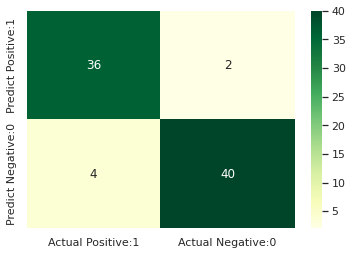

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.95      0.91      0.93        44

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0732


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.9302325581395349
Accuracy: 0.926829268292683
Recall : 0.9090909090909091
Precision : 0.9523809523809523


# <h1 align="center">LightGBM </h1>


As we know, LightGBM doesn't provide desired result in smaller dataset. Still, we will apply Random search cv function on our LightGBM model to hypertune our predictions.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train, y_train)
print(clf.best_params_)
predicted=clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted))

{'reg_alpha': 0.03, 'num_leaves': 40, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.1}
Classification of the result is:
0.926829268292683


In [ ]:
clf= LGBMClassifier(reg_alpha=0.03, num_leaves=40, min_child_samples=10, max_depth=10, learning_rate=0.1)
clf.fit(x_train,y_train)

LGBMClassifier(max_depth=10, min_child_samples=10, num_leaves=40,
               reg_alpha=0.03)

In [ ]:
#Prediction
y_pred_train = clf.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [ ]:
#Prediction
y_pred_test = clf.predict(x_test)
y_pred_test

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
92.6829268292683


We tried using GridSearchCV with our LightGBM model. However, it led to the falling of the results. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution

## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[36  2]
 [ 4 40]]

True Positives(TP) =  36

True Negatives(TN) =  40

False Positives(FP) =  2

False Negatives(FN) =  4


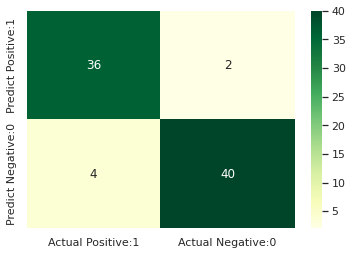

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.95      0.91      0.93        44

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0732


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

'''f1 Score : 0.9555555555555557
Accuracy: 0.9512195121951219
Recall : 0.9772727272727273
Precision : 0.9347826086956522'''

f1 Score : 0.9302325581395349
Accuracy: 0.926829268292683
Recall : 0.9090909090909091
Precision : 0.9523809523809523


'f1 Score : 0.9555555555555557\nAccuracy: 0.9512195121951219\nRecall : 0.9772727272727273\nPrecision : 0.9347826086956522'

# <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.3039009200887178
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.2, 'subsample': 0.7}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.3, reg_lambda=1.2, subsample=0.7)
xg.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400,
              reg_alpha=1.3, reg_lambda=1.2, subsample=0.7)

In [ ]:
y_pred_train = xg.predict(x_train)
#convert into binary values
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0

In [ ]:
y_pred_test = xg.predict(x_test)
for i in range(0, len(y_pred_test)):
    if y_pred_test[i]>= 0.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:  
       y_pred_test[i]=0

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
99.69135802469135


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
95.1219512195122


## <h1 align="center"> Confusion Matrix </h1>

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  3]
 [ 1 43]]

True Positives(TP) =  35

True Negatives(TN) =  43

False Positives(FP) =  3

False Negatives(FN) =  1


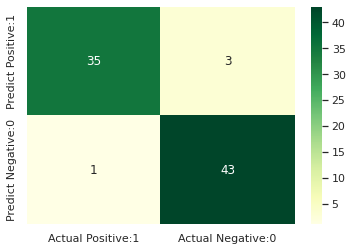

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.93      0.98      0.96        44

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0488


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.9555555555555557
Accuracy: 0.9512195121951219
Recall : 0.9772727272727273
Precision : 0.9347826086956522


# <b> <h1 align="center"> CONCLUSION </h1> </b>

In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'LightGBM': [0.9302325581395349,
  0.926829268292683,
  0.9523809523809523,
  0.9090909090909091,
  0.07317073170731707],
 'Random Forest': [0.9302325581395349,
  0.926829268292683,
  0.9523809523809523,
  0.9090909090909091,
  0.07317073170731707],
 'XGBoost': [0.9555555555555557,
  0.9512195121951219,
  0.9347826086956522,
  0.9772727272727273,
  0.04878048780487805]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error']
model_comp_df = model_comp_df.sort_values('F1 Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error
Random Forest,0.930233,0.926829,0.952381,0.909091,0.073171
LightGBM,0.930233,0.926829,0.952381,0.909091,0.073171
XGBoost,0.955556,0.951220,0.934783,0.977273,0.048780


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

<b> Explanation: </b>
<ul>
<li> XGBoost:
<br>
<table align="left">
<tr>
<th> Parameters </th>
<th> Original </th>
<th> Hypertuned </th>
</tr>
<tr>
<td> F1 Score </td>
<td>91.95%
<td> 95.55%
</tr>
<tr>
<td> Accuracy </td>
<td>91.46%
<td> 95.12%
</tr>
<tr>
<td> Precision </td>
<td>93.02%
<td> 93.47%
</tr>
<tr>
<td> Recall </td>
<td>90.90%
<td> 97.72%
</tr>
<tr>
<td> Classification error</td>
<td>8.535
<td> 4.87%
</tr>
</table>
</li>
<br>
<br>

<ul>
<li>LightGBM:
<br>
<table align="left">
<tr>
<th> Parameters </th>
<th> Original </th>
<th> Hypertuned </th>
</tr>
<tr>
<td> F1 Score </td>
<td>95.55%
<td> 94.11%
</tr>
<tr>
<td> Accuracy </td>
<td>95.12%
<td> 93.90%
</tr>
<tr>
<td> Precision </td>
<td>93.47%
<td> 97.56%
</tr>
<tr>
<td> Recall </td>
<td>97.72%
<td> 90.90%
</tr>
<tr>
<td> Classification error</td>
<td>4.87%
<td> 6.09%
</tr>
</table>


<ul>
<li>Random Forest:
<br>
<table align="left">
<tr>
<th> Parameters </th>
<th> Original </th>
<th> Hypertuned </th>
</tr>
<tr>
<td> F1 Score </td>
<td>91.76%
<td> 93.02%
</tr>
<tr>
<td> Accuracy </td>
<td>91.46%
<td> 92.68%
</tr>
<tr>
<td> Precision </td>
<td>95.12%
<td> 95.23%
</tr>
<tr>
<td> Recall </td>
<td>88.63%
<td> 90.90%
</tr>
<tr>
<td> Classification error</td>
<td>8.53%
<td> 7.31%
</tr>
</table>

<b>Now we have predictions of both models. We can clearly realize the difference that GridSearchCV predictions are better. Also, we used very less parameters in tuning process.

<h1 aign="center" > <b> BEST MODEL: </b> </h1>
<ul>
<li> <b>XGBoost is the best model algorithm for our problem: Heart Failure Prediction. </b>
<li> As it is clearly visible from our output, XGBoost has the maximum F1 score, maximum accuracy and maximum recall value.
<li> XGBoost shows the lowest classification error as well.

In [ ]:
df.tail(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
279,55.0,0,84,1,38,0,451000.00,1.3,136,0,0,246,0
280,70.0,0,2695,1,40,0,241000.00,1.0,137,1,0,247,0
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
282,42.0,0,64,0,30,0,215000.00,3.8,128,1,1,250,0
283,65.0,0,1688,0,38,0,263358.03,1.1,138,1,1,250,0
284,50.0,1,54,0,40,0,279000.00,0.8,141,1,0,250,0
285,55.0,1,170,1,40,0,336000.00,1.2,135,1,0,250,0
286,60.0,0,253,0,35,0,279000.00,1.7,140,1,0,250,0
287,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,256,0


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.3, reg_lambda=1.2, subsample=0.7)
xg.fit(x_train, y_train)
def XGmodel(x):
    y = xg.predict(x)
    return y

print("Death Event Original for [62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270] :", 0)
print("Death Event Predicted for [62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270] :", XGmodel([62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270]))
print()
print("Death Event Original for [45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280] :", 0)
print("Death Event Predicted for [45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280] :", XGmodel([45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280]))
print()
print("Death Event Original for [70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247]:", 0)
print("Death Event Predicted for [70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247] :", XGmodel([70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247]))

Death Event Original for [62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270] : 0
Death Event Predicted for [62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270] : [0]

Death Event Original for [45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280] : 0
Death Event Predicted for [45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280] : [0]

Death Event Original for [70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247]: 0
Death Event Predicted for [70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247] : [0]


<h3> References: </h3>




1.   https://www.cdc.gov/heartdisease/heart_failure.htm
2.   Epidemiology of heart failure- https://onlinelibrary.wiley.com/doi/full/10.1002/ejhf.1858#.YsYuepL1Q38.twitter 
3. https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
4. Citation-
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)
5. License-
CC BY 4.0
6. Splash icon-
Icon by Freepik, available on Flaticon.
7. Splash banner-
Wallpaper by jcomp, available on Freepik.
